In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GpUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GpUs Available:  1


## Data preparation

In [6]:
# Organize data into train, valid, test dirs
os.chdir('D:\Cuproject\harsh09')
if os.path.isdir('D:\Cuproject\train/image') is False:
    os.makedirs('train/image')
    os.makedirs('train/gg')
    os.makedirs('valid/image')
    os.makedirs('valid/gg')
    os.makedirs('test/image')
    os.makedirs('test/gg')

    for i in random.sample(glob.glob('gg*'), 200):
        shutil.move(i, 'train/gg')      
    for i in random.sample(glob.glob('image*'), 200):
        shutil.move(i, 'train/image')
    for i in random.sample(glob.glob('gg*'), 100):
        shutil.move(i, 'valid/gg')        
    for i in random.sample(glob.glob('image*'), 100):
        shutil.move(i, 'valid/image')
    for i in random.sample(glob.glob('gg*'), 80):
        shutil.move(i, 'test/gg')      
    for i in random.sample(glob.glob('image*'), 80):
        shutil.move(i, 'test/image')

os.chdir('../../')

## Process the data

In [7]:
train_path = 'D:\Cuproject\harsh09/train'
valid_path = 'D:\Cuproject\harsh09/valid'
test_path = 'D:\Cuproject\harsh09/test'

In [8]:
# We have to put data into that formate in which the model is expecting
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['gg', 'image'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['gg', 'image'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['gg', 'image'], batch_size=10, shuffle=False)

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [9]:
assert train_batches.n == 400
assert valid_batches.n == 200
assert test_batches.n == 160
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

## Visualise the data

In [10]:
imgs, labels = next(train_batches)

In [11]:
#This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

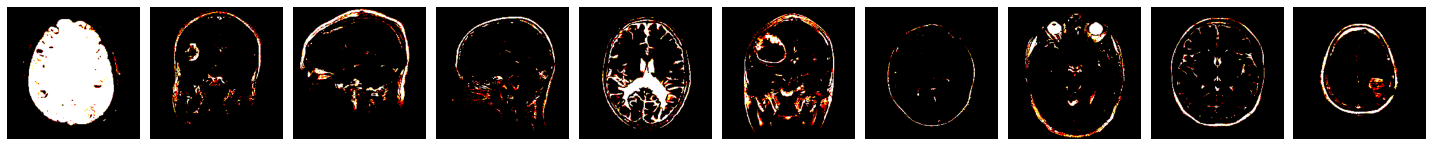

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [12]:
plotImages(imgs)
print(labels)

## Build and train a CNN

In [13]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 40 steps, validate for 20 steps
Epoch 1/10
40/40 - 9s - loss: 30.0781 - accuracy: 0.7675 - val_loss: 3.8950 - val_accuracy: 0.9100
Epoch 2/10
40/40 - 2s - loss: 1.8255 - accuracy: 0.9400 - val_loss: 2.2648 - val_accuracy: 0.9100
Epoch 3/10
40/40 - 2s - loss: 0.6188 - accuracy: 0.9600 - val_loss: 1.4890 - val_accuracy: 0.9500
Epoch 4/10
40/40 - 2s - loss: 0.1830 - accuracy: 0.9875 - val_loss: 0.8882 - val_accuracy: 0.9550
Epoch 5/10
40/40 - 2s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8154 - val_accuracy: 0.9650
Epoch 6/10
40/40 - 2s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8935 - val_accuracy: 0.9550
Epoch 7/10
40/40 - 2s - loss: 4.0437e-06 - accuracy: 1.0000 - val_loss: 0.9837 - val_accuracy: 0.9550
Epoch 8/10
40/40 - 2s - loss: 7.3313e-06 - accuracy: 1.0000 - val_loss: 0.9774 - val_accuracy: 0.9550
Epoch 9/10
40/40 - 2s - loss: 4.5792e-06 - accuracy: 1.0000 - val_loss: 0.9728 - val_accuracy: 0.9550
Epoch 10/10
4

## Predict

## Preparing the Test Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

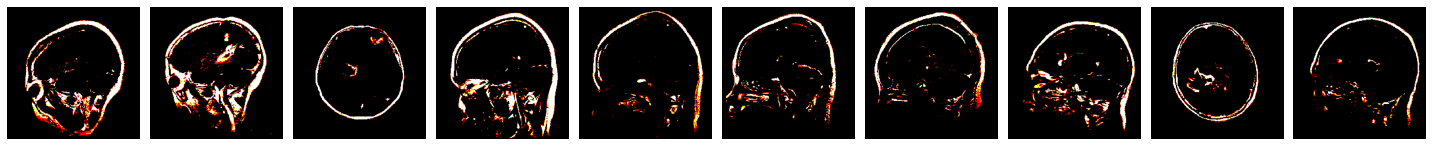

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [16]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

## Predicting On The Test Data

In [18]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [19]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [20]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

## Plotting Predictions With A Confusion Matrix

In [21]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
#gg = "the MRI Image having the Tumor"
#image = "the MRI having no sign of tumor"
#We can then inspect the class_indices for the labels so that we know in which order to pass them to our confusion matrix.
test_batches.class_indices

{'gg': 0, 'image': 1}

Confusion matrix, without normalization
[[75  5]
 [ 3 77]]


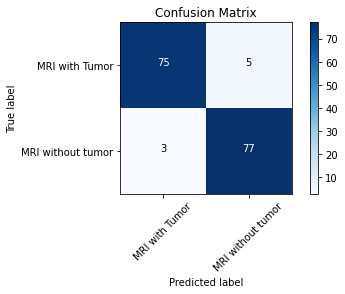

In [31]:
cm_plot_labels = ['MRI with Tumor','MRI without tumor']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Build Fine-tuned VGG16 model

In [33]:
#Download model - Internet connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 850s 2us/step


In [34]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [35]:
# Returning model from keras functional API
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [36]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [37]:
for layer in model.layers:
    layer.trainable = False

In [38]:
model.add(Dense(units=2, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Train the fined-tuned VGG16 model

In [40]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 40 steps, validate for 20 steps
Epoch 1/5
40/40 - 8s - loss: 0.8416 - accuracy: 0.5775 - val_loss: 0.4297 - val_accuracy: 0.8100
Epoch 2/5
40/40 - 6s - loss: 0.3391 - accuracy: 0.8650 - val_loss: 0.2540 - val_accuracy: 0.9150
Epoch 3/5
40/40 - 6s - loss: 0.2230 - accuracy: 0.9250 - val_loss: 0.2014 - val_accuracy: 0.9300
Epoch 4/5
40/40 - 6s - loss: 0.1731 - accuracy: 0.9475 - val_loss: 0.1681 - val_accuracy: 0.9450
Epoch 5/5
40/40 - 6s - loss: 0.1432 - accuracy: 0.9525 - val_loss: 0.1468 - val_accuracy: 0.9650


In [42]:
assert model.history.history.get('accuracy')[-1] > 0.95

## Predict using fine-tuned VGG16 model

In [43]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [44]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [45]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [46]:
test_batches.class_indices

{'gg': 0, 'image': 1}

Confusion matrix, without normalization
[[78  2]
 [ 7 73]]


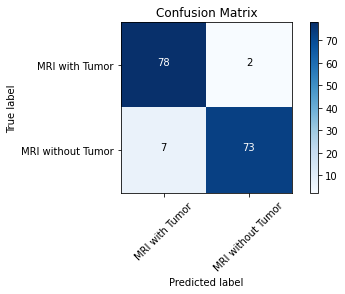

In [47]:
cm_plot_labels = ['MRI with Tumor','MRI without Tumor']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')